In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [3]:
filename = '19.10.2022, 15.53,  434.92596121 THz.xlsx'
sheetname = '19.10.2022, 15.53,  434.9259612'
row_start = 41
row_end = 25245

df = pd.read_excel(filename,sheet_name=sheetname,header=int(row_start)-2,nrows=int(row_end)-int(row_start)+1)

In [4]:
df

,Time [ms],"Signal 7 Wavelength, vac. [nm]",Unnamed: 2,Unnamed: 3,Unnamed: 4
0,9.871927e+02,689.295621,NaN,NaN,NaN
1,1.974132e+03,689.295622,NaN,NaN,NaN
2,2.961219e+03,689.295623,NaN,NaN,NaN
3,3.948394e+03,689.295623,NaN,NaN,NaN
4,4.935376e+03,689.295623,NaN,NaN,NaN
...,...,...,...,...,...
25200,9.738207e+06,689.295389,NaN,NaN,NaN
25201,9.738357e+06,689.295389,NaN,NaN,NaN
25202,9.738507e+06,689.295389,NaN,NaN,NaN
25203,9.738657e+06,689.295389,NaN,NaN,NaN


In [5]:
## Change column name for df.plot

df.columns = ['time / ms','wavelength / nm','a','b','c'] # rename ([] and _ cannot be processed by LaTeX weird.. space is ok)
df

,time / ms,wavelength / nm,a,b,c
0,9.871927e+02,689.295621,NaN,NaN,NaN
1,1.974132e+03,689.295622,NaN,NaN,NaN
2,2.961219e+03,689.295623,NaN,NaN,NaN
3,3.948394e+03,689.295623,NaN,NaN,NaN
4,4.935376e+03,689.295623,NaN,NaN,NaN
...,...,...,...,...,...
25200,9.738207e+06,689.295389,NaN,NaN,NaN
25201,9.738357e+06,689.295389,NaN,NaN,NaN
25202,9.738507e+06,689.295389,NaN,NaN,NaN
25203,9.738657e+06,689.295389,NaN,NaN,NaN


## Using df.plot to plot

In [6]:
## Filter unwanted data

# df = df[df["wavelength / nm"] > 0] #filter out -3 in wavelength
# df = df[df["wavelength / nm"] > 689] #filter out in wavelength
# df = df[df["wavelength / nm"] < 689.65] #filter out in wavelength

In [7]:
## Convert ms to s

df.iloc[:,0] = df.iloc[:,0]/1000 #convert ms to s

## Rename again 

df.columns = ['time / s','wavelength / nm','a','b','c']

In [8]:
df

,time / s,wavelength / nm,a,b,c
0,0.987193,689.295621,NaN,NaN,NaN
1,1.974132,689.295622,NaN,NaN,NaN
2,2.961219,689.295623,NaN,NaN,NaN
3,3.948395,689.295623,NaN,NaN,NaN
4,4.935376,689.295623,NaN,NaN,NaN
...,...,...,...,...,...
25200,9738.207062,689.295389,NaN,NaN,NaN
25201,9738.356888,689.295389,NaN,NaN,NaN
25202,9738.506963,689.295389,NaN,NaN,NaN
25203,9738.657191,689.295389,NaN,NaN,NaN


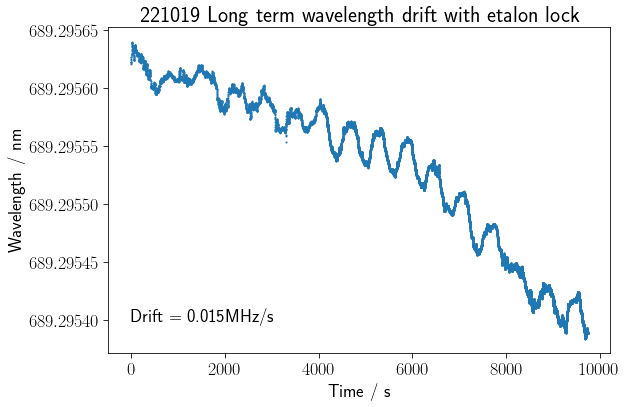

In [18]:
## Plot out

df.plot("time / s",
        "wavelength / nm",
        kind='scatter',
        s=1,
        figsize=(9,6),
        xlabel='Time / s',
        ylabel='Wavelength / nm',
        title='221019 Long term wavelength drift with etalon lock')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.annotate('Drift = 0.015MHz/s',xy=(0,689.29540))
# plt.show()
plt.savefig('221019 Long term wavelength drift with etalon lock'+'.png',bbox_inches='tight',dpi=300)

## Wavelength drift calculation

In [11]:
t1 = df.iloc[0,0] #time
t2 = df.iloc[-1,0]

# convert from nm to Hz

c = 299792458
f1 = c/(df.iloc[0,1]*1e-9) #freq
f2 = c/(df.iloc[-1,1]*1e-9)

In [12]:
drift_rate = (f1-f2)/(t2-t1)/1e6 #MHz/s
drift_rate  #MHz/s

-0.015041738817372786